<a href="https://colab.research.google.com/github/shareefat/Deep_learning_Projects/blob/main/Fashion_mnist_using_CNN_and_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

(x_train, y_train), (x_test,y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

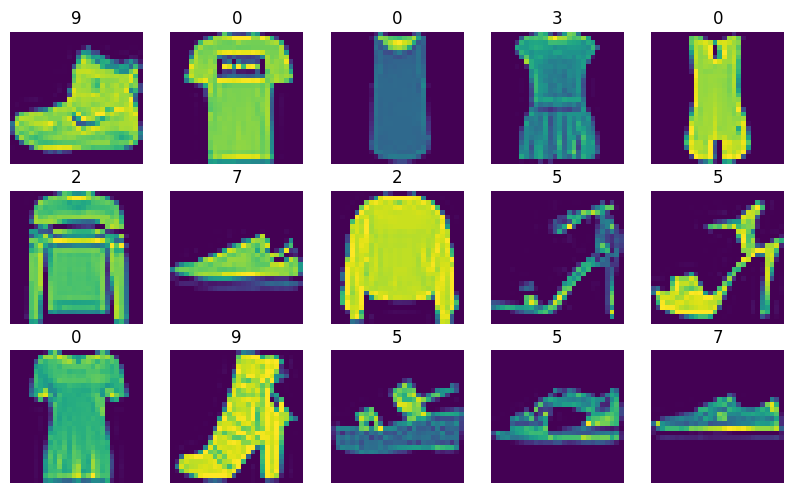

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(15):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])
  plt.axis("off")
  plt.title(y_train[i])
plt.show()


In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0


In [ ]:
#Convert

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D
model = tf.keras.Sequential([
            Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)), # 28x28 pixel and 1 channel(b/s it is a grey scale image)
            MaxPooling2D((2,2)),
            Conv2D(32,(3,3), activation = 'relu'),
            MaxPooling2D((2,2)),
            Conv2D(32,(3,3), activation = 'relu'),
            AveragePooling2D((2,2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dense(10,activation = "softmax")])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [ ]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.6496 - loss: 0.9300
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.8122 - loss: 0.5053
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8398 - loss: 0.4287
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8570 - loss: 0.3822
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.8722 - loss: 0.3438
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8779 - loss: 0.3290
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.8840 - loss: 0.3116
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8922 - loss: 0.2892
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.8941 - loss: 0.2839
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.9006 - loss: 0.2693


In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8756 - loss: 0.3485


[0.3373122215270996, 0.8769999742507935]

#Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmentation = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
augmentation.fit(x_train)
augmentation.fit(x_test)

In [ ]:
augment1 = augmentation.flow(x_train,y_train)
augment2 = augmentation.flow(x_test,y_test)

In [ ]:
augmented_image1 = next(augment1)[0].astype('int')
augmented_image2 = next(augment2)[0].astype('int')

In [ ]:
augmented_image1.shape

(32, 28, 28, 1)

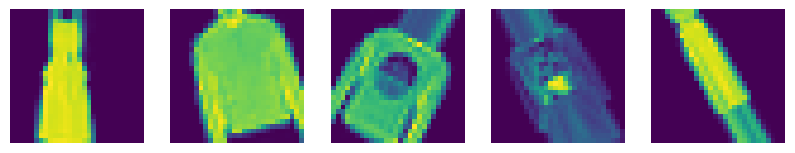

In [ ]:
plt.figure(figsize=(10,10))
for i in range(1,6):
  plt.subplot(1,5,i)
  plt.imshow(augment1[0][0][i])
  plt.axis("off")
plt.show()

In [ ]:
model = tf.keras.Sequential([
            Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)), # 28x28 pixel and 1 channel(b/s it is a grey scale image)
            MaxPooling2D((2,2)),
            Conv2D(32,(3,3), activation = 'relu'),
            MaxPooling2D((2,2)),
            Conv2D(32,(3,3), activation = 'relu'),
            AveragePooling2D((2,2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dense(10,activation = "softmax")])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.6381 - loss: 0.9606
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8083 - loss: 0.5253
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8419 - loss: 0.4329
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8530 - loss: 0.3936
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8622 - loss: 0.3697
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8744 - loss: 0.3368
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8808 - loss: 0.3179
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8864 - loss: 0.3056
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8900 - loss: 0.2950
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8928 - loss: 0.2819


In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8808 - loss: 0.3438


[0.33582696318626404, 0.878600001335144]

In [ ]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
import numpy as np
y_predictions = []
for i in y_pred:
  y_predictions.append(np.argmax(i))
y_predictions[:5]

[9, 2, 1, 1, 6]

In [ ]:
cm = tf.math.confusion_matrix(y_test, y_predictions)

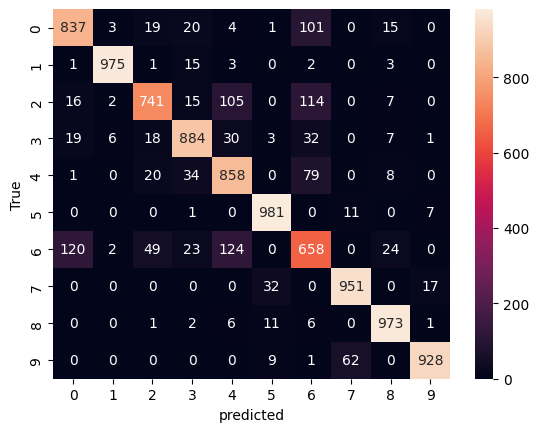

In [ ]:
import seaborn as sns

sns.heatmap(cm, annot =True, fmt = 'd')
plt.xlabel("predicted")
plt.ylabel('True')
plt.show()